Scenario:

The provided code actually implements a decision tree classification model, not a linear regression model. Linear regression is used for continuous target variables, while decision trees are for classification problems with discrete target variables (like 0 or 1 in this case).
We will modify the data generation part to include a continuous target variable (price) related to the existing features (coordinates).
Class 1 (represented by y=1) will have higher prices on average compared to Class 0 (represented by y=0).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  # for linear regression


In [3]:
print("Setting random seed for reproducibility...")
np.random.seed(50)

Setting random seed for reproducibility...


In [4]:
print("Defining means and covariance matrix for feature distribution...")
mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]

Defining means and covariance matrix for feature distribution...


In [5]:
N = 1500

print("Generating features (X) from three Gaussian distributions...")
X = np.concatenate((
    np.random.multivariate_normal(mean1, cov, int(N/6)),
    np.random.multivariate_normal(mean2, cov, int(N/6)),
    np.random.multivariate_normal(mean3, cov, int(N/6)),
    20 * np.random.rand(int(N/2), 2)
))

Generating features (X) from three Gaussian distributions...


In [6]:
print("Sample of the first 5 feature points:")
print(X[:5])  # Display the first 5 rows of features


Sample of the first 5 feature points:
[[ 3.0808485  13.94204621]
 [ 4.83834929 11.2600208 ]
 [ 8.64150932 13.10811583]
 [ 4.5398758  16.00228759]
 [ 3.60105022 11.51651438]]


In [7]:
# Generate Target Variable with Class-based Pricing

print("Generating target variable (y) with higher prices for class 1...")
y = np.concatenate((
    np.random.normal(loc=15, scale=2, size=int(N/2)),  # Higher price for class 1
    np.random.normal(loc=10, scale=1.5, size=int(N/2))   # Lower price for class 0
))

Generating target variable (y) with higher prices for class 1...


In [8]:
print("Sample of the first 5 target values:")
print(y[:5])  # Display the first 5 target values

Sample of the first 5 target values:
[17.37421163 17.82695119 18.78915041 15.32968182 17.95152294]


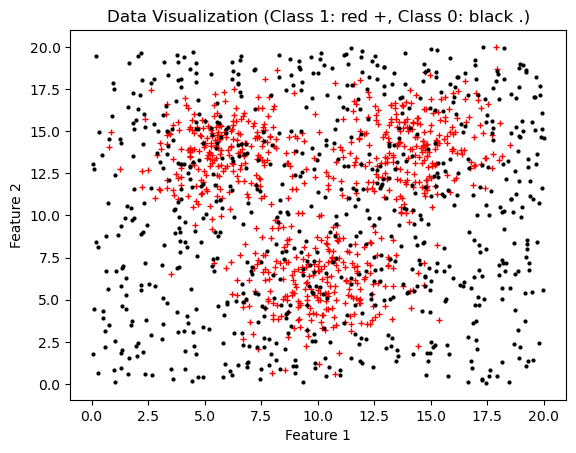

In [9]:
plt.plot(X[:int(N/2), 0], X[:int(N/2),1], 'r+', X[int(N/2):,0],X[int(N/2):,1],'k.', ms=4)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Visualization (Class 1: red +, Class 0: black .)")
plt.show()  # Display the data plot


In [10]:
 #Model Creation and Evaluation

print("Adding a constant term (bias) to the feature matrix (X)...")
X = sm.add_constant(X)


Adding a constant term (bias) to the feature matrix (X)...


In [11]:
print("Creating and fitting the linear regression model...")
model = sm.OLS(y, X).fit()


Creating and fitting the linear regression model...


In [12]:
print("Model summary:")
print(model.summary())

Model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7.690
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           0.000476
Time:                        00:07:05   Log-Likelihood:                -3817.6
No. Observations:                1500   AIC:                             7641.
Df Residuals:                    1497   BIC:                             7657.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1845      0.245     

In [15]:
import numpy as np
import csv

# Data Generation (your existing code here)

# Save dataset to CSV
with open('waringagibson.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Feature 1', 'Feature 2', 'Price'])  # Write header row
    for i in range(N):
        csv_writer.writerow([X[i, 0], X[i, 1], y[i]])  # Write each data point with both features

print("Dataset generated and saved to 'waringagibson.csv'")


Dataset generated and saved to 'waringagibson.csv'
